In [1]:
import moviepy.editor as mpe
import numpy as np
from glob import glob
import sys, os
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
video = mpe.VideoFileClip("datasets/Video_003.avi")

In [3]:
video.subclip(0, 50).ipython_display()

100%|█████████▉| 350/351 [00:00<00:00, 1429.12it/s]


In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [5]:
def create_data_matrix_from_video(clip, k=5, scale=50):
    all_frames = []
    print("Clip duration:", clip.duration)
    for i in range(int(k*clip.duration)):
        gray_frame = rgb2gray(clip.get_frame(i/float(k)))
        all_frames.append(scipy.misc.imresize(gray_frame, scale).flatten())
    return np.vstack(all_frames).T

In [6]:
def get_dims(scale):
    return (int(240 * (scale/100)), int(320 * (scale/100)))

In [7]:
M = create_data_matrix_from_video(video, 100, scale=25)

Clip duration: 113.57


In [8]:
M.shape, get_dims(25)

((4800, 11357), (60, 80))

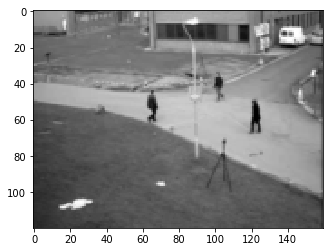

In [9]:
plt.imshow(np.reshape(M[:,100], get_dims(50)), cmap='gray');

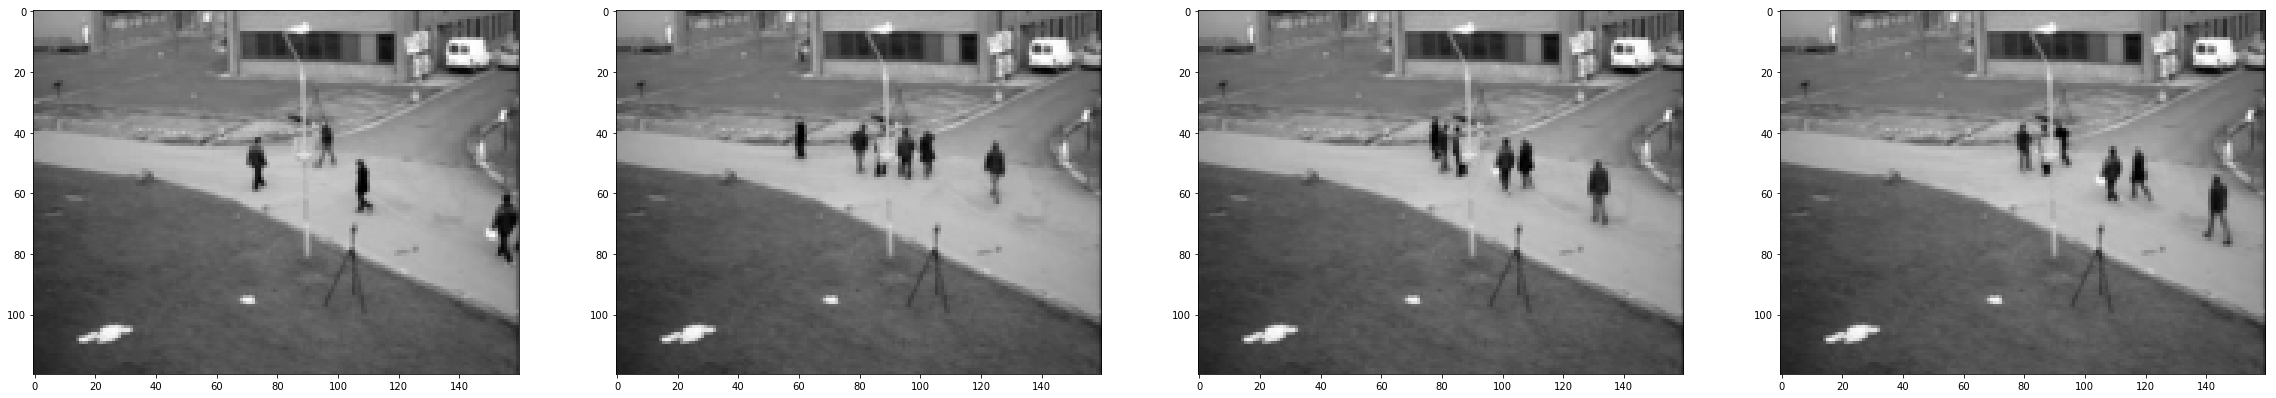

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_figheight(40)
fig.set_figwidth(40)
ax1.imshow(np.reshape(M[:, np.random.randint(0,1000)], get_dims(50)), cmap='gray');
ax2.imshow(np.reshape(M[:, np.random.randint(0,1000)], get_dims(50)), cmap='gray');
ax3.imshow(np.reshape(M[:, np.random.randint(0,1000)], get_dims(50)), cmap='gray');
ax4.imshow(np.reshape(M[:, np.random.randint(0,1000)], get_dims(50)), cmap='gray');

In [9]:
#saving data_matrix
np.save('datasets/data_matrix.npy', M)

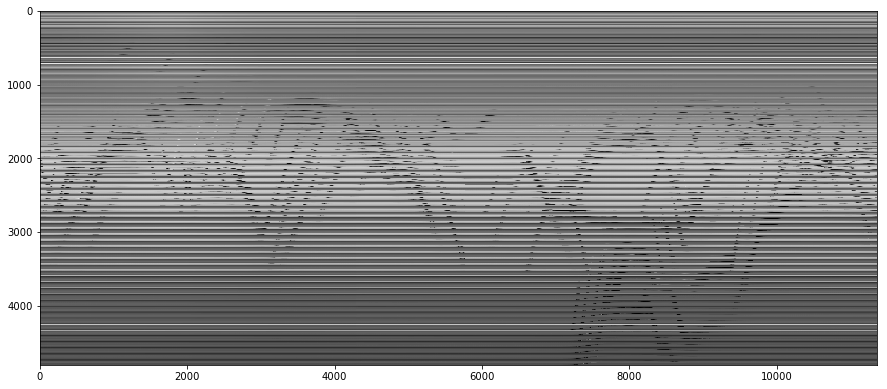

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(M, cmap='gray')

Wavy lines are people moving!, rest is the still background

### SVD

In [11]:
from sklearn import decomposition

In [12]:
%time u, s, v = decomposition.randomized_svd(M, 2)

CPU times: user 5.1 s, sys: 10.5 s, total: 15.6 s
Wall time: 4.51 s


In [13]:
u.shape, s.shape, v.shape

((4800, 2), (2,), (2, 11357))

In [14]:
reconstructed_low_rank_matrix = np.matmul(np.matmul(u, np.diag(s)), v)

In [15]:
reconstructed_low_rank_matrix.shape

(4800, 11357)

In [16]:
M.shape

(4800, 11357)

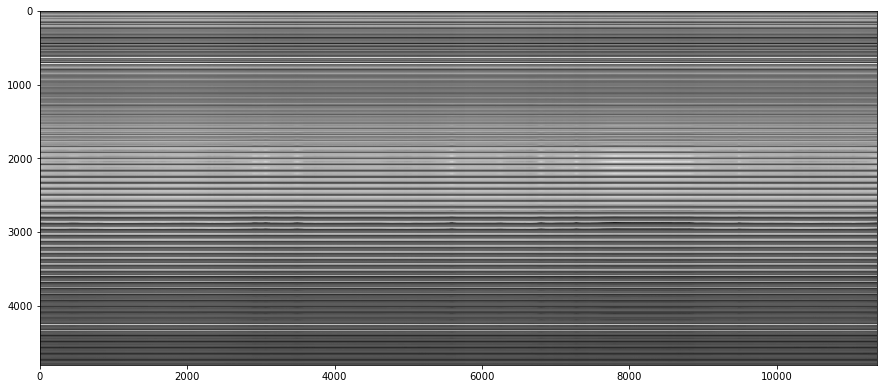

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(reconstructed_low_rank_matrix, cmap='gray')

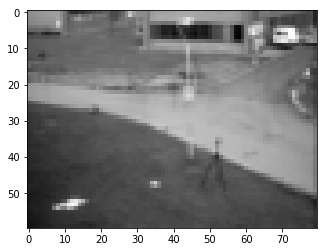

In [19]:
plt.imshow(np.reshape(reconstructed_low_rank_matrix[:,100], get_dims(25)), cmap='gray');

#### Removing background (Low res images below: scaled to 25% of the original image)

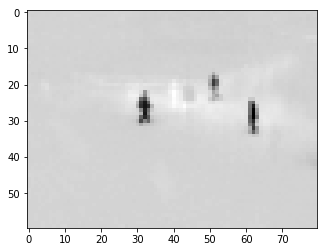

In [23]:
plt.imshow(np.reshape(M[:,100] - reconstructed_low_rank_matrix[:,100], get_dims(25)), cmap='gray')

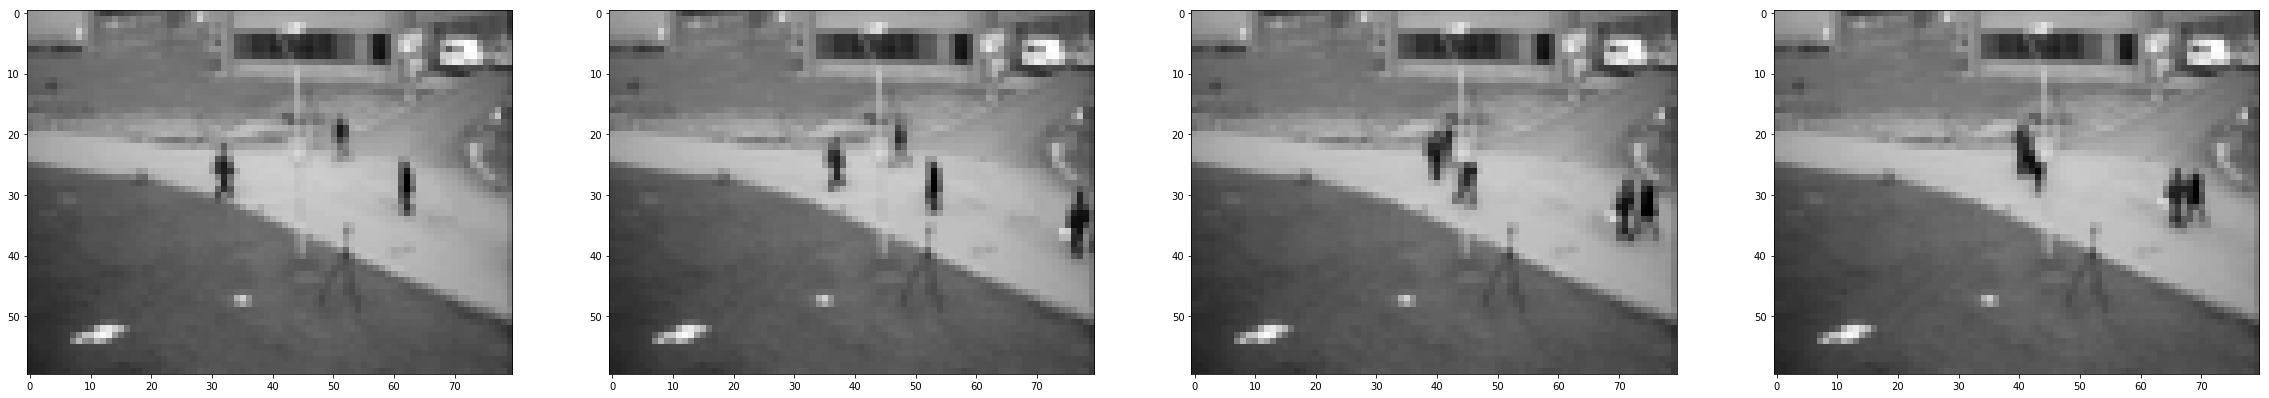

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_figheight(40)
fig.set_figwidth(40)
ax1.imshow(np.reshape(M[:, 100], get_dims(25)), cmap='gray');
ax2.imshow(np.reshape(M[:, 220], get_dims(25)), cmap='gray');
ax3.imshow(np.reshape(M[:, 340], get_dims(25)), cmap='gray');
ax4.imshow(np.reshape(M[:, 460], get_dims(25)), cmap='gray');

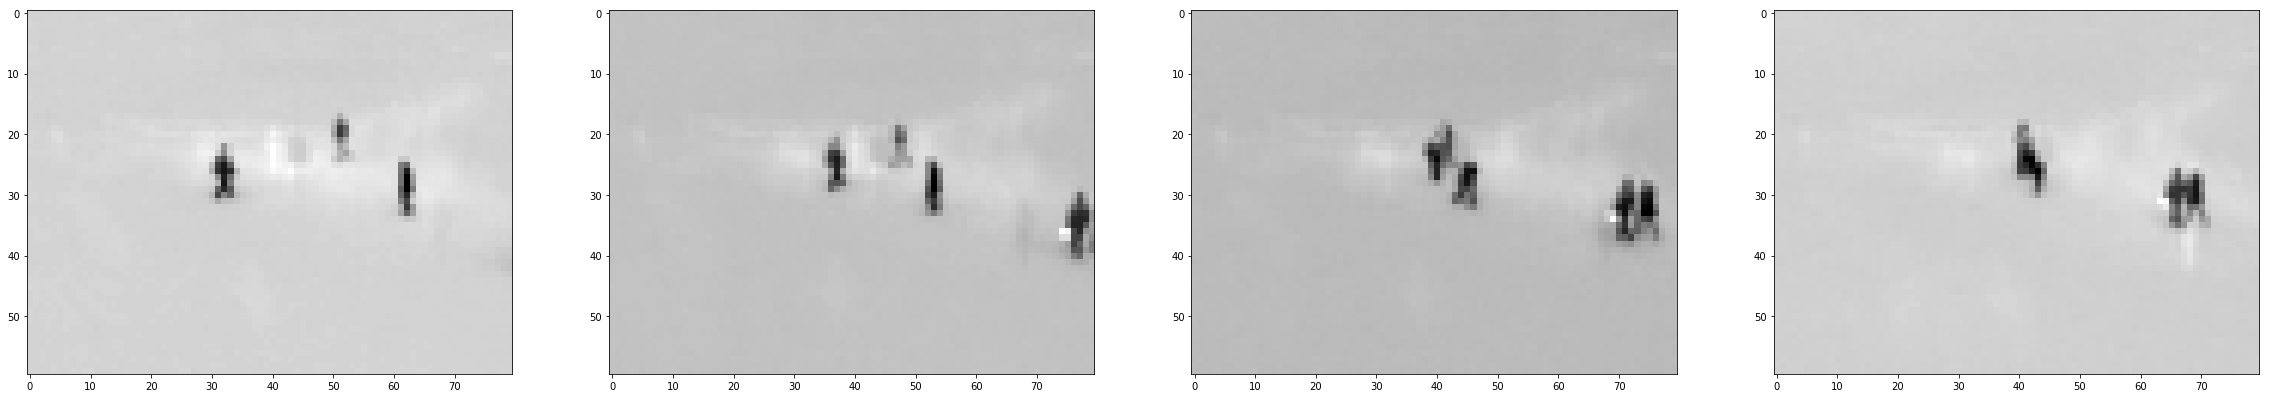

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_figheight(40)
fig.set_figwidth(40)
ax1.imshow(np.reshape(M[:,100] - reconstructed_low_rank_matrix[:,100], get_dims(25)), cmap='gray');
ax2.imshow(np.reshape(M[:,220] - reconstructed_low_rank_matrix[:,220], get_dims(25)), cmap='gray');
ax3.imshow(np.reshape(M[:,340] - reconstructed_low_rank_matrix[:,340], get_dims(25)), cmap='gray');
ax4.imshow(np.reshape(M[:,460] - reconstructed_low_rank_matrix[:,460], get_dims(25)), cmap='gray');